In [1]:
import os
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tqdm import tqdm

In [2]:
# Kiểm tra xem có GPU không và sử dụng nó nếu có
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Định nghĩa mô hình CNN
class AnimalClassifier(nn.Module):
    def __init__(self):
        super(AnimalClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.15),

            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.1),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.1),

            nn.Flatten(),
            nn.Linear(64 * 18 * 18, 512),
            nn.ReLU(),
            nn.Linear(512, 3),  # 3 lớp đầu ra
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.model(x)

In [3]:
# Khởi tạo mô hình và hàm tối ưu
model = AnimalClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Chuẩn bị dữ liệu sử dụng ImageFolder và DataLoader
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

data_dir = "/home/dangth2004/Downloads/CNN_MultiClass_data/animals"
train_data = datasets.ImageFolder(root=data_dir, transform=transform)
train_size = int(0.75 * len(train_data))
val_size = len(train_data) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_data, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=15, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=15, shuffle=False)

In [4]:
# Huấn luyện mô hình
num_epochs = 15
train_losses, val_losses = [], []
train_acc, val_acc = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_acc.append(100 * correct_train / len(train_loader.dataset))

    # Đánh giá trên tập validation
    model.eval()
    val_loss = 0.0
    correct_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_acc.append(100 * correct_val / len(val_loader.dataset))

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Train Acc: {train_acc[-1]:.2f}%, Val Acc: {val_acc[-1]:.2f}%")

100%|█████████████████████████████████████████████████████| 150/150 [00:07<00:00, 20.47it/s]


Epoch [1/15], Train Loss: 1.0177, Val Loss: 0.9588, Train Acc: 51.20%, Val Acc: 55.47%


100%|█████████████████████████████████████████████████████| 150/150 [00:06<00:00, 22.55it/s]


Epoch [2/15], Train Loss: 0.9216, Val Loss: 0.9081, Train Acc: 60.89%, Val Acc: 62.00%


100%|█████████████████████████████████████████████████████| 150/150 [00:06<00:00, 22.43it/s]


Epoch [3/15], Train Loss: 0.8601, Val Loss: 0.9112, Train Acc: 67.11%, Val Acc: 61.33%


100%|█████████████████████████████████████████████████████| 150/150 [00:06<00:00, 22.38it/s]


Epoch [4/15], Train Loss: 0.8420, Val Loss: 0.9197, Train Acc: 69.73%, Val Acc: 61.47%


100%|█████████████████████████████████████████████████████| 150/150 [00:07<00:00, 21.26it/s]


Epoch [5/15], Train Loss: 0.8294, Val Loss: 0.8989, Train Acc: 71.02%, Val Acc: 63.47%


100%|█████████████████████████████████████████████████████| 150/150 [00:07<00:00, 20.64it/s]


Epoch [6/15], Train Loss: 0.7590, Val Loss: 0.8668, Train Acc: 78.71%, Val Acc: 67.20%


100%|█████████████████████████████████████████████████████| 150/150 [00:07<00:00, 19.47it/s]


Epoch [7/15], Train Loss: 0.7506, Val Loss: 0.8635, Train Acc: 79.78%, Val Acc: 68.00%


100%|█████████████████████████████████████████████████████| 150/150 [00:06<00:00, 21.59it/s]


Epoch [8/15], Train Loss: 0.7500, Val Loss: 0.8684, Train Acc: 79.33%, Val Acc: 67.87%


100%|█████████████████████████████████████████████████████| 150/150 [00:06<00:00, 22.60it/s]


Epoch [9/15], Train Loss: 0.7124, Val Loss: 0.8784, Train Acc: 83.78%, Val Acc: 66.53%


100%|█████████████████████████████████████████████████████| 150/150 [00:06<00:00, 22.59it/s]


Epoch [10/15], Train Loss: 0.7101, Val Loss: 0.8883, Train Acc: 83.87%, Val Acc: 64.67%


100%|█████████████████████████████████████████████████████| 150/150 [00:06<00:00, 22.73it/s]


Epoch [11/15], Train Loss: 0.6901, Val Loss: 0.8798, Train Acc: 85.96%, Val Acc: 66.00%


100%|█████████████████████████████████████████████████████| 150/150 [00:06<00:00, 22.41it/s]


Epoch [12/15], Train Loss: 0.6716, Val Loss: 0.8740, Train Acc: 87.96%, Val Acc: 66.80%


100%|█████████████████████████████████████████████████████| 150/150 [00:06<00:00, 22.39it/s]


Epoch [13/15], Train Loss: 0.6604, Val Loss: 0.8794, Train Acc: 88.98%, Val Acc: 66.67%


100%|█████████████████████████████████████████████████████| 150/150 [00:06<00:00, 22.45it/s]


Epoch [14/15], Train Loss: 0.6528, Val Loss: 0.8670, Train Acc: 89.87%, Val Acc: 66.53%


100%|█████████████████████████████████████████████████████| 150/150 [00:06<00:00, 22.32it/s]


Epoch [15/15], Train Loss: 0.6442, Val Loss: 0.8755, Train Acc: 90.58%, Val Acc: 66.40%


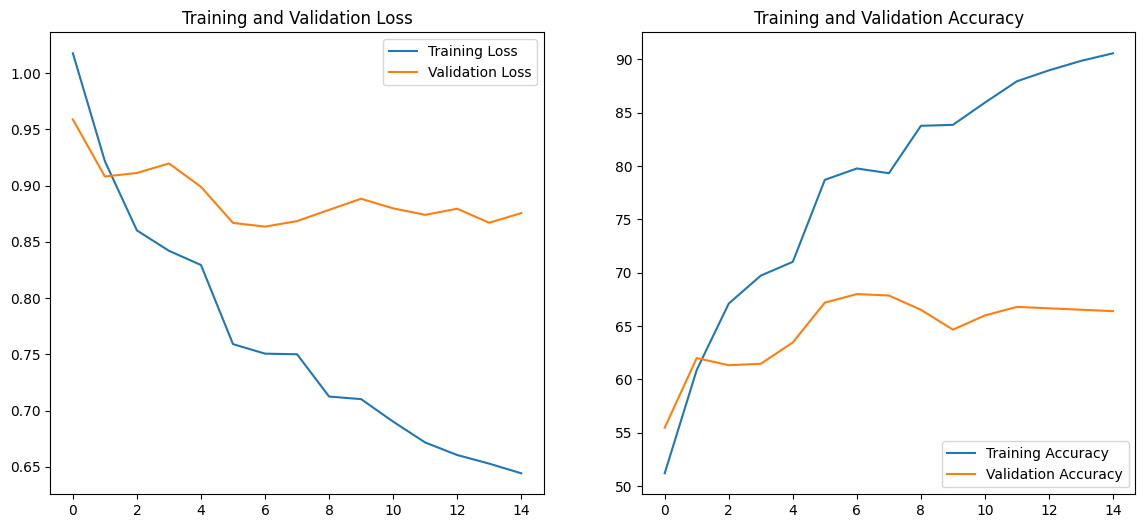

In [5]:
# Vẽ đồ thị Loss và Accuracy
epochs_range = range(num_epochs)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.plot(epochs_range, val_losses, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()